In [1]:
import pandas as pd
import numpy as np

# Preprocesamiento

In [2]:
venancio = pd.read_parquet('../expresion/venancio.parquet')
venancio

Gene,Glyma.01G000100,Glyma.01G000137,Glyma.01G000174,Glyma.01G000211,Glyma.01G000248,Glyma.01G000285,Glyma.01G000322,Glyma.01G000359,Glyma.01G000400,Glyma.01G000600,...,Glyma.U044501,Glyma.U044700,Glyma.U044800,Glyma.U045000,Glyma.U045100,Glyma.U045402,Glyma.U045502,Glyma.U045602,Glyma.U045702,Glyma.U045802
biosample,,,,,,,,,,,,,,,,,,,,,
SAMN00265078,5.453108,59.054636,1.408092,1.218809,0.000000,2.651369,2.801494,0.377480,0.523319,2.993846,...,0.0,0.000000,0.0,0.0,0.0,4.317951,0.421438,11.072744,0.000000,0.053070
SAMN00265079,6.500151,56.896441,6.155613,2.903028,14.714201,12.752819,4.904175,6.120868,7.059885,6.651526,...,0.0,0.000000,0.0,0.0,0.0,4.313916,0.000000,8.977273,0.518904,1.336911
SAMN00265080,3.103596,0.000000,4.038168,0.000000,2.434158,7.362351,1.693301,4.158352,9.958392,9.768484,...,0.0,0.000000,0.0,0.0,0.0,0.723192,0.000000,6.653363,0.000000,2.470588
SAMN00265081,4.226230,0.000000,4.021155,0.441538,2.820968,4.016449,1.627095,4.222031,7.327622,10.667464,...,0.0,0.000000,0.0,0.0,0.0,0.931953,0.297342,0.000000,0.390688,0.777894
SAMN00265082,2.582089,0.000000,1.710374,0.980639,5.646594,3.689870,1.837848,8.406095,5.689184,4.331051,...,0.0,0.000000,0.0,0.0,0.0,0.495017,0.000000,2.276112,0.000000,0.595369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN09295126,6.011819,0.000000,2.234152,0.000000,0.000000,2.596353,1.998173,0.000000,9.105045,4.742704,...,0.0,0.000000,0.0,0.0,0.0,8.817960,0.000000,32.194774,0.000000,0.000000
SAMN09295127,5.552961,21.092150,0.000000,0.000000,0.000000,0.000000,0.700031,1.792143,8.356985,3.354179,...,0.0,0.000000,0.0,0.0,0.0,5.273037,0.000000,0.000000,0.000000,0.604034
SAMN09295128,5.692426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.120328,4.756147,3.019845,...,0.0,0.000000,0.0,0.0,0.0,1.545678,0.000000,0.000000,0.000000,0.000000


In [3]:
condicion = pd.read_csv('../estres/condicion.csv', index_col=0)
condicion

,condicion
biosample,
SAMN09513405,inoculated
SAMN36760700,temperature
SAMN22841297,iron
SAMN20971795,inoculated
SAMN21359827,iron
...,...
SAMN36630242,control
SAMN10588612,stress
SAMN05327852,infest


In [4]:
joined = venancio.join(condicion, how='inner')
joined

,Glyma.01G000100,Glyma.01G000137,Glyma.01G000174,Glyma.01G000211,Glyma.01G000248,Glyma.01G000285,Glyma.01G000322,Glyma.01G000359,Glyma.01G000400,Glyma.01G000600,...,Glyma.U044700,Glyma.U044800,Glyma.U045000,Glyma.U045100,Glyma.U045402,Glyma.U045502,Glyma.U045602,Glyma.U045702,Glyma.U045802,condicion
biosample,,,,,,,,,,,,,,,,,,,,,
SAMN01832611,2.205258,4.293608,0.749227,0.000000,0.571893,0.683551,0.406310,4.507280,3.181278,2.008139,...,0.000000,0.0,0.0,0.0,0.971847,0.681915,4.389021,0.162994,1.194552,temperature
SAMN01832612,6.303268,35.158119,1.117744,3.329690,2.099569,0.783507,0.821285,3.595717,5.752380,2.216453,...,0.000000,0.0,0.0,0.0,3.248304,0.968212,77.347862,0.594672,3.812861,temperature
SAMN09721190,4.213194,0.000000,1.542603,4.220830,1.855070,7.259857,3.029194,1.548782,6.153414,6.296393,...,0.000000,0.0,0.0,0.0,1.129907,0.000000,18.988707,0.628695,1.132018,control
SAMN09721192,2.125068,0.000000,1.049754,8.249072,4.015680,6.595197,4.151787,1.117554,8.433468,7.394026,...,0.000000,0.0,0.0,0.0,0.702249,0.364903,21.250680,0.445419,1.962291,control
SAMN09721194,1.430937,0.000000,0.780220,4.549979,1.126286,7.174136,3.442154,4.232104,5.894421,7.096925,...,0.000000,0.0,0.0,0.0,1.694896,0.682466,16.894285,0.448642,1.487442,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN09295123,3.444500,38.534956,2.597795,6.499872,13.833061,0.000000,0.736119,3.414490,5.902229,6.290318,...,0.000000,0.0,0.0,0.0,10.052597,0.000000,17.402883,0.000000,2.402208,inoculated
SAMN09295124,8.835724,0.000000,0.000000,7.037998,9.864735,0.000000,3.454180,0.000000,10.320040,10.668034,...,0.000000,0.0,0.0,0.0,10.874979,0.000000,17.698496,0.000000,1.596461,inoculated
SAMN09295128,5.692426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.120328,4.756147,3.019845,...,0.000000,0.0,0.0,0.0,1.545678,0.000000,0.000000,0.000000,0.000000,inoculated


In [5]:
X = joined.drop('condicion', axis=1)
y = joined.condicion

# Modelado

In [6]:
from sklearn import model_selection, ensemble, manifold
import matplotlib.pyplot as plt

In [7]:
tsne = manifold.TSNE()
X_tsne = tsne.fit_transform(X)

In [8]:
sra = pd.read_csv('../metadata/sra.csv', index_col=0)
joined = joined.join(sra['bioproject'])

/tmp/ipykernel_165643/2964818719.py:1: DtypeWarning: Columns (60,69,72,78,95,96,97,103,104,105,109,112,116,121,122,132,133,138,139,141,145,146,147,161,166,167,169,170,171,173,174,176,177,179,180,186,187,188,189,190,191,192,193,194,195,196,197,199,200,201,202,203,204,205,207,212,213,218,219,220,222,224,225,226,227,228,229,230,231,232,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266) have mixed types. Specify dtype option on import or set low_memory=False.
  sra = pd.read_csv('../metadata/sra.csv', index_col=0)


Text(0.5, 1.0, 't-SNE expresión genes\npor bioproject')

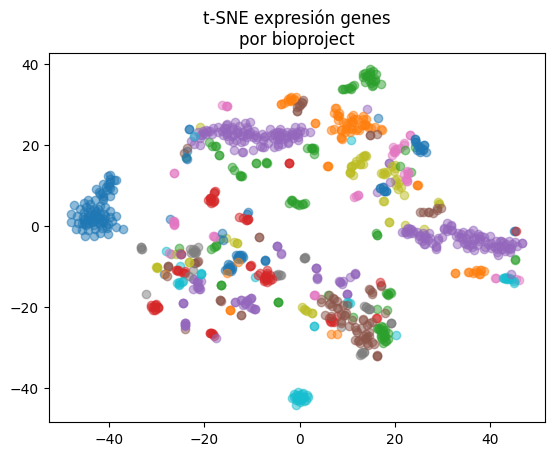

In [9]:
for condicion in joined['bioproject'].unique():
    plt.scatter(X_tsne[joined['bioproject'] == condicion, 0], X_tsne[joined['bioproject'] == condicion, 1], alpha=0.5, label=condicion)
plt.title('t-SNE expresión genes\npor bioproject')

Text(0.5, 1.0, 't-SNE expresión genes\npor estrés')

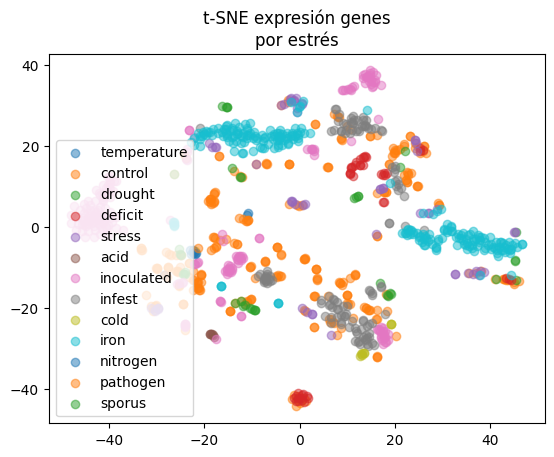

In [10]:
for condicion in y.unique():
    plt.scatter(X_tsne[y == condicion, 0], X_tsne[y == condicion, 1], alpha=0.5, label=condicion)
plt.legend()
plt.title('t-SNE expresión genes\npor estrés')

In [11]:
y = y == 'control'
y

biosample
SAMN01832611    False
SAMN01832612    False
SAMN09721190     True
SAMN09721192     True
SAMN09721194     True
                ...  
SAMN09295123    False
SAMN09295124    False
SAMN09295128    False
SAMN09295129    False
SAMN09295130    False
Name: condicion, Length: 1002, dtype: bool

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [13]:
random_forest = ensemble.RandomForestClassifier()
params = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(20, 50, 10),
    'min_samples_split': np.arange(2, 15, 4),
    'min_samples_leaf': np.arange(2, 15, 4),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

In [14]:
search = model_selection.RandomizedSearchCV(estimator=random_forest, param_distributions=params, n_jobs=-1)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': array([20, 30, 40]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 2,  6, 10, 14]),
                                        'min_samples_split': array([ 2,  6, 10, 14]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [15]:
search.cv_results_['mean_test_score'].mean()

0.8339717439293597

In [16]:
estimator = search.best_estimator_
importances = np.flip(np.sort(estimator.feature_importances_))
importances

array([0.00232477, 0.00155401, 0.00154802, ..., 0.        , 0.        ,
       0.        ])

Text(0.5, 1.0, 'Importancias de features ordenadas (Random Forest)')

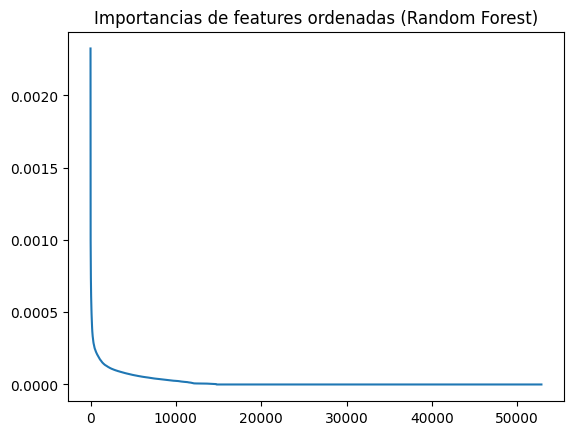

In [17]:
plt.plot(importances)
plt.title('Importancias de features ordenadas (Random Forest)')

In [18]:
X.columns[estimator.feature_importances_ > 0]

Index(['Glyma.01G000174', 'Glyma.01G000248', 'Glyma.01G000900',
       'Glyma.01G001200', 'Glyma.01G001350', 'Glyma.01G001700',
       'Glyma.01G001900', 'Glyma.01G002501', 'Glyma.01G002600',
       'Glyma.01G002902',
       ...
       'Glyma.U033005', 'Glyma.U033205', 'Glyma.U033305', 'Glyma.U036800',
       'Glyma.U039400', 'Glyma.U039500', 'Glyma.U041300', 'Glyma.U043000',
       'Glyma.U044000', 'Glyma.U044201'],
      dtype='object', length=14747)

In [19]:
X_tsne = tsne.fit_transform(X.loc[:, estimator.feature_importances_ > 0.001])

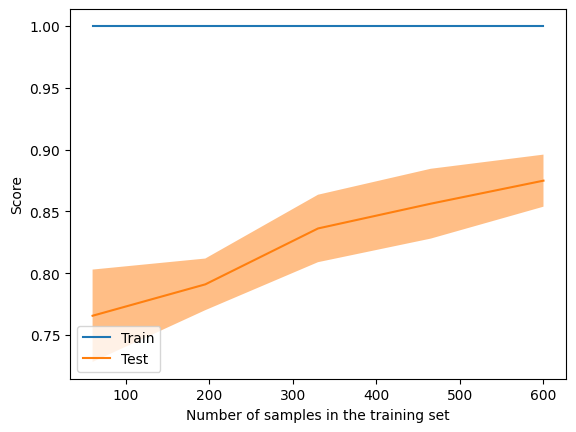

In [20]:
model_selection.LearningCurveDisplay.from_estimator(estimator, X_train, y_train)

Text(0.5, 1.0, 't-SNE expresión genes seleccionados')

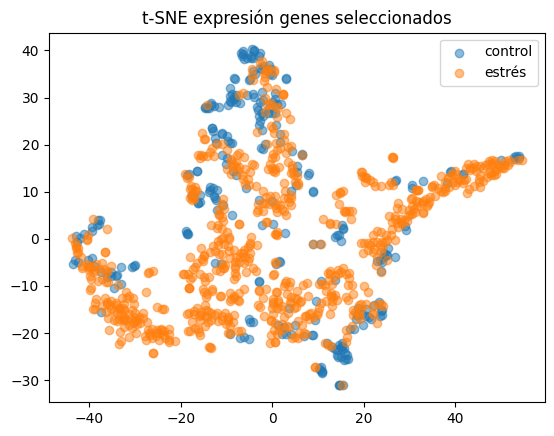

In [21]:
plt.scatter(X_tsne[y, 0], X_tsne[y, 1], alpha=0.5, label='control')
plt.scatter(X_tsne[~y, 0], X_tsne[~y, 1], alpha=0.5, label='estrés')
plt.legend()
plt.title('t-SNE expresión genes seleccionados')

In [22]:
gbr = ensemble.GradientBoostingClassifier()
params = {
    "loss": ['log_loss', 'exponential'],
    "learning_rate": np.arange(0, 10, 1),
    "n_estimators": np.arange(1, 200, 1),
    "max_depth": np.arange(1, 50, 1),
    "max_features": ['sqrt', 'log2']
}

In [23]:
search = model_selection.RandomizedSearchCV(gbr, param_distributions=params, n_jobs=-1)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': ['sqrt',...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])})

In [24]:
search.cv_results_['mean_test_score'].mean()

0.7869183222958057

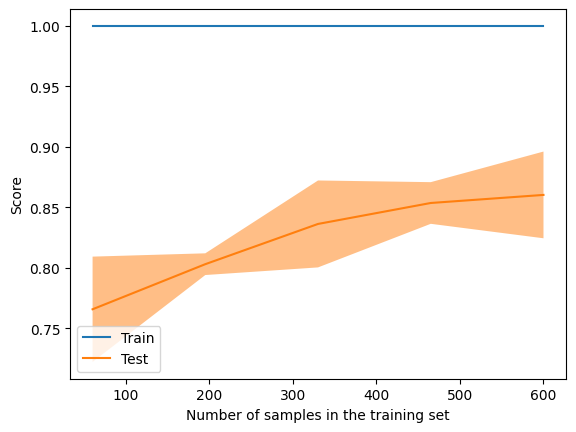

In [25]:
model_selection.LearningCurveDisplay.from_estimator(search.best_estimator_, X_train, y_train)